In [2]:
import numpy as np
import pandas as pd
import random
import string
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from tqdm import tqdm

In [199]:
np.random.seed(42)  # Set a random seed for reproducibility

n_samples = 1000  # Number of samples
feature1_mean = 10.0  # Mean value for feature 1
feature1_std = 2.0  # Standard deviation for feature 1
feature2_mean = 5.0  # Mean value for feature 2
feature2_std = 1.0  # Standard deviation for feature 2

grouping_categories1 = list(range(2,11))  # Categories for grouping column 1
grouping_categories2 = list(range(8,23))  # Categories for grouping column 2
grouping_categories3 = list(range(20,40))  # Categories for grouping column 3

grouping_effect_std = 1.0  # Standard deviation of the random effects

# Generate feature columns
X_feature1 = np.random.normal(feature1_mean, feature1_std, n_samples).reshape(-1, 1)
X_feature2 = np.random.normal(feature2_mean, feature2_std, n_samples).reshape(-1, 1)

# Generate grouping columns
X_grouping1 = np.random.choice(grouping_categories1, n_samples).reshape(-1, 1)
X_grouping2 = np.random.choice(grouping_categories2, n_samples).reshape(-1, 1)
X_grouping3 = np.random.choice(grouping_categories3, n_samples).reshape(-1, 1)

# Generate random effects for grouping columns
random_effects = np.random.normal(0, grouping_effect_std, n_samples).reshape(-1, 1)

# Generate target variable with mixed effects
y = (
    2 * X_feature1.flatten() +
    3 * X_feature2.flatten() +
    (X_grouping1.flatten() == 7).astype(int) * 5 +
    (X_grouping2.flatten() == 12).astype(int) * 2 +
    (X_grouping3.flatten() == 18).astype(int) * 4 +
    random_effects.flatten()
)

# Create a DataFrame with the generated data
data = pd.DataFrame({
    'Feature1': X_feature1.flatten(),
    'Feature2': X_feature2.flatten(),
    'Grouping1': X_grouping1.flatten(),
    'Grouping2': X_grouping2.flatten(),
    'Grouping3': X_grouping3.flatten(),
    'Target': y
})

n_additional_grouping_columns = 50  # Number of additional grouping columns

grouping_noise = pd.DataFrame([])

for i in range(4, 51):
    
    indices_less_than_zero = []
    grouping_noise['Grouping'+str(i)] = data['Grouping'+str(np.random.randint(1, 4))] + np.random.randint(-4, 4)
    indices_less_than_zero = grouping_noise.index[grouping_noise['Grouping'+str(i)] < 0]
    grouping_noise.loc[indices_less_than_zero, "Grouping"+str(i)] = 0    
    
    print(len(grouping_noise.index[grouping_noise['Grouping'+str(i)] < 0]))
    if len(grouping_noise.index[grouping_noise['Grouping'+str(i)] < 0]) == 0:
        print("No Negative values in cat columns")
    else:
        print("Code is WRONG")

data = pd.concat([data, grouping_noise], axis=1)
data

0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat columns
0
No Negative values in cat 

,Feature1,Feature2,Grouping1,Grouping2,Grouping3,Target,Grouping4,Grouping5,Grouping6,Grouping7,...,Grouping41,Grouping42,Grouping43,Grouping44,Grouping45,Grouping46,Grouping47,Grouping48,Grouping49,Grouping50
0,10.993428,6.399355,7,19,36,45.128595,39,4,37,15,...,36,15,16,21,21,21,38,4,8,22
1,9.723471,5.924634,4,9,23,36.162340,26,1,24,5,...,23,5,6,11,11,11,25,1,5,12
2,11.295377,5.059630,9,11,27,36.849062,30,6,28,7,...,27,7,8,13,13,13,29,6,10,14
3,13.046060,4.353063,4,13,24,38.658819,27,1,25,9,...,24,9,10,15,15,15,26,1,5,16
4,9.531693,5.698223,3,8,35,35.773261,38,0,36,4,...,35,4,5,10,10,10,37,0,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.437799,6.070150,8,20,29,37.823562,32,5,30,16,...,29,16,17,22,22,22,31,5,9,23
996,13.595373,4.973479,6,21,21,42.161554,24,3,22,17,...,21,17,18,23,23,23,23,3,7,24
997,11.281686,4.118125,6,18,20,35.553278,23,3,21,14,...,20,14,15,20,20,20,22,3,7,21
998,8.857642,4.836933,4,8,35,33.304617,38,1,36,4,...,35,4,5,10,10,10,37,1,5,11


In [200]:
grouping_col = list(f"Grouping{i}" for i in range(1,51))

In [215]:
from itertools import combinations
combi = list(combinations(grouping_col, 4))
len(combi)

230300

In [1]:
accuracyList = []
for i, selCol in tqdm(enumerate(combi)):
    X = pd.concat([data[list(selCol)], data.iloc[:,:2]], axis=1)
#     X.drop('Target', axis=1, inplace=True)
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    pipeline = make_pipeline(MinMaxScaler(), LinearRegression())
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    accuracyList.append(mean_squared_error(y_test, y_pred))

accuracyList

NameError: name 'tqdm' is not defined

In [210]:
idx = accuracyList.index(min(accuracyList))
combi[idx], min(accuracyList)

(('Grouping1', 'Grouping7'), 3.6432547464521052)

In [211]:
main = ["Feature1","Feature2","Grouping1","Grouping2","Grouping3"]
X = data[main]
X

,Feature1,Feature2,Grouping1,Grouping2,Grouping3
0,10.993428,6.399355,7,19,36
1,9.723471,5.924634,4,9,23
2,11.295377,5.059630,9,11,27
3,13.046060,4.353063,4,13,24
4,9.531693,5.698223,3,8,35
...,...,...,...,...,...
995,9.437799,6.070150,8,20,29
996,13.595373,4.973479,6,21,21
997,11.281686,4.118125,6,18,20
998,8.857642,4.836933,4,8,35


In [212]:
# main = ["Feature1","Feature2","Grouping17","Grouping43","Grouping46"]
X = data.drop("Target", axis=1)
# X = data[data["Feature1","Feature2","Grouping1","Grouping2","Grouping3"]]
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
pipeline = make_pipeline(MinMaxScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(mean_squared_error(y_test, y_pred))

3.6404619054154663


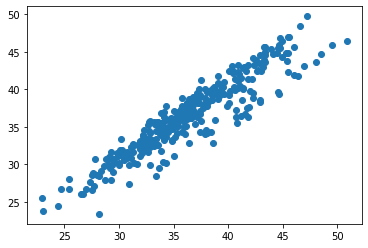

In [213]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)